# Breast Cancer Detection


### Import packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

## Exploratory Analysis

### Read and load Dataset

In [ ]:
df = pd.read_csv(r"/data/cancer dataset.csv")

Before we look into the content of the data, we first need to look into the general structure of the data , i.e., the number of rows (data points)and number of columns (features) in it.

In [ ]:
print(np.shape(df))
print(np.unique(df['diagnosis'])) #benign or malignant
df.isna().sum()

(569, 32)
['B' 'M']


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#look at the data types to see which columns need to be encoded
#is there null value?
#columns name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


diagnosis
B    357
M    212
Name: count, dtype: int64


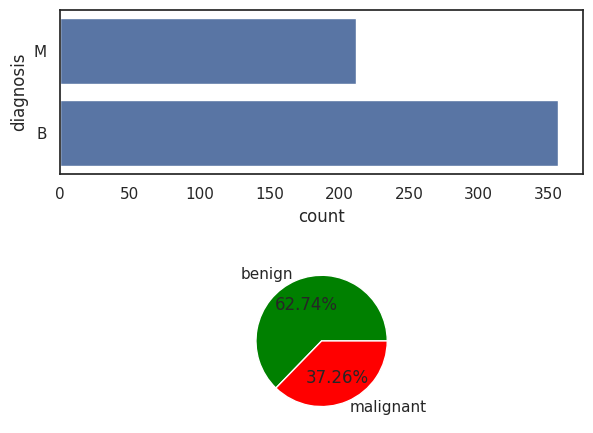

In [ ]:
#get a count ofthe number of Malignant (M) or Benign (B) cells
print(df.diagnosis.value_counts())

#visualize the count
fig, axs = plt.subplots(2)
sns.countplot(df.diagnosis, label="count", ax =axs[0])

# using pie chart to visualize the percentange of disease or not
axs[1].pie(df.diagnosis.value_counts(),colors=['green','red'], autopct='%.2f%%', labels=['benign','malignant'])

# Adjusting layout
fig.tight_layout(pad=2.0)

# Show the plots
plt.show()

## Data Visualization

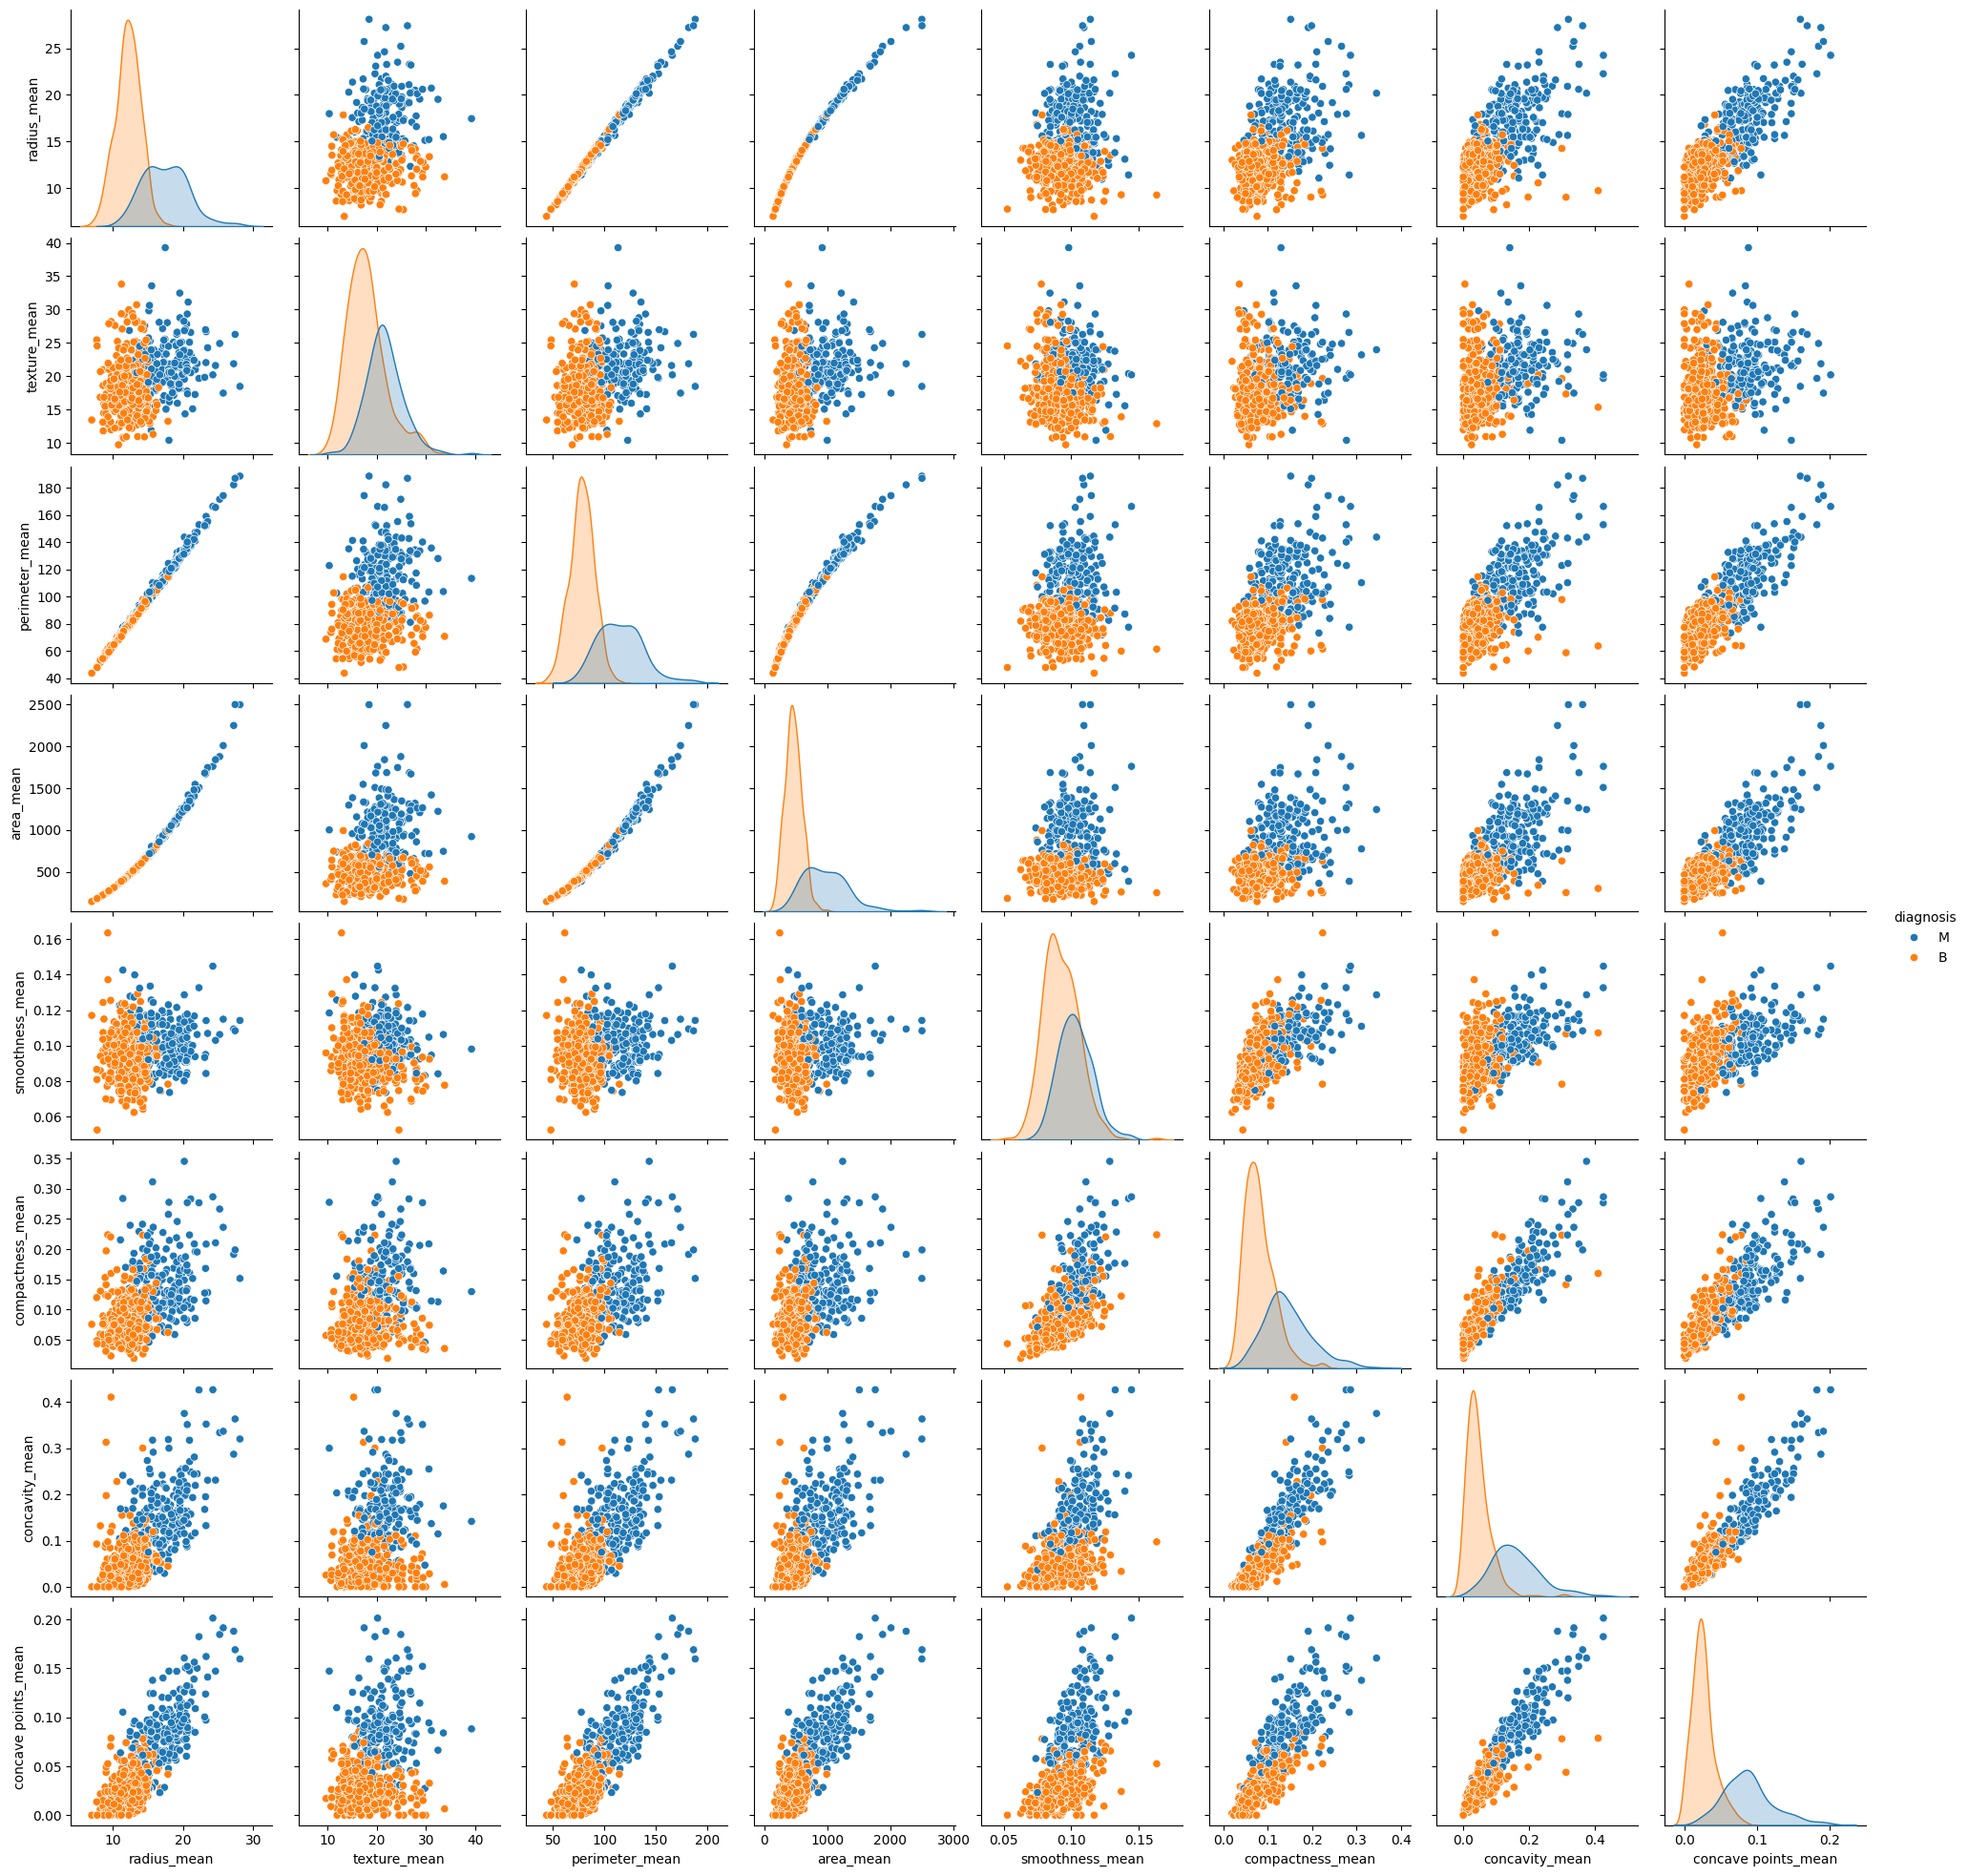

In [ ]:
#create a pair plot
sns.pairplot(df.iloc[:,1:10],hue="diagnosis")
plt.show()

## Encoding Data

In [ ]:
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [ ]:
X = df.iloc[:,2:].values #features that help us determine if patient has cancer or not
Y = df.iloc[:,1].values.astype('int') #this is the target variable which indicates diagnosis
np.shape(X),np.shape(Y)

((569, 30), (569,))

## Feature importances

Correlation Matrix: A correlation matrix shows the relationship between two given variables in the form of a matrix.  

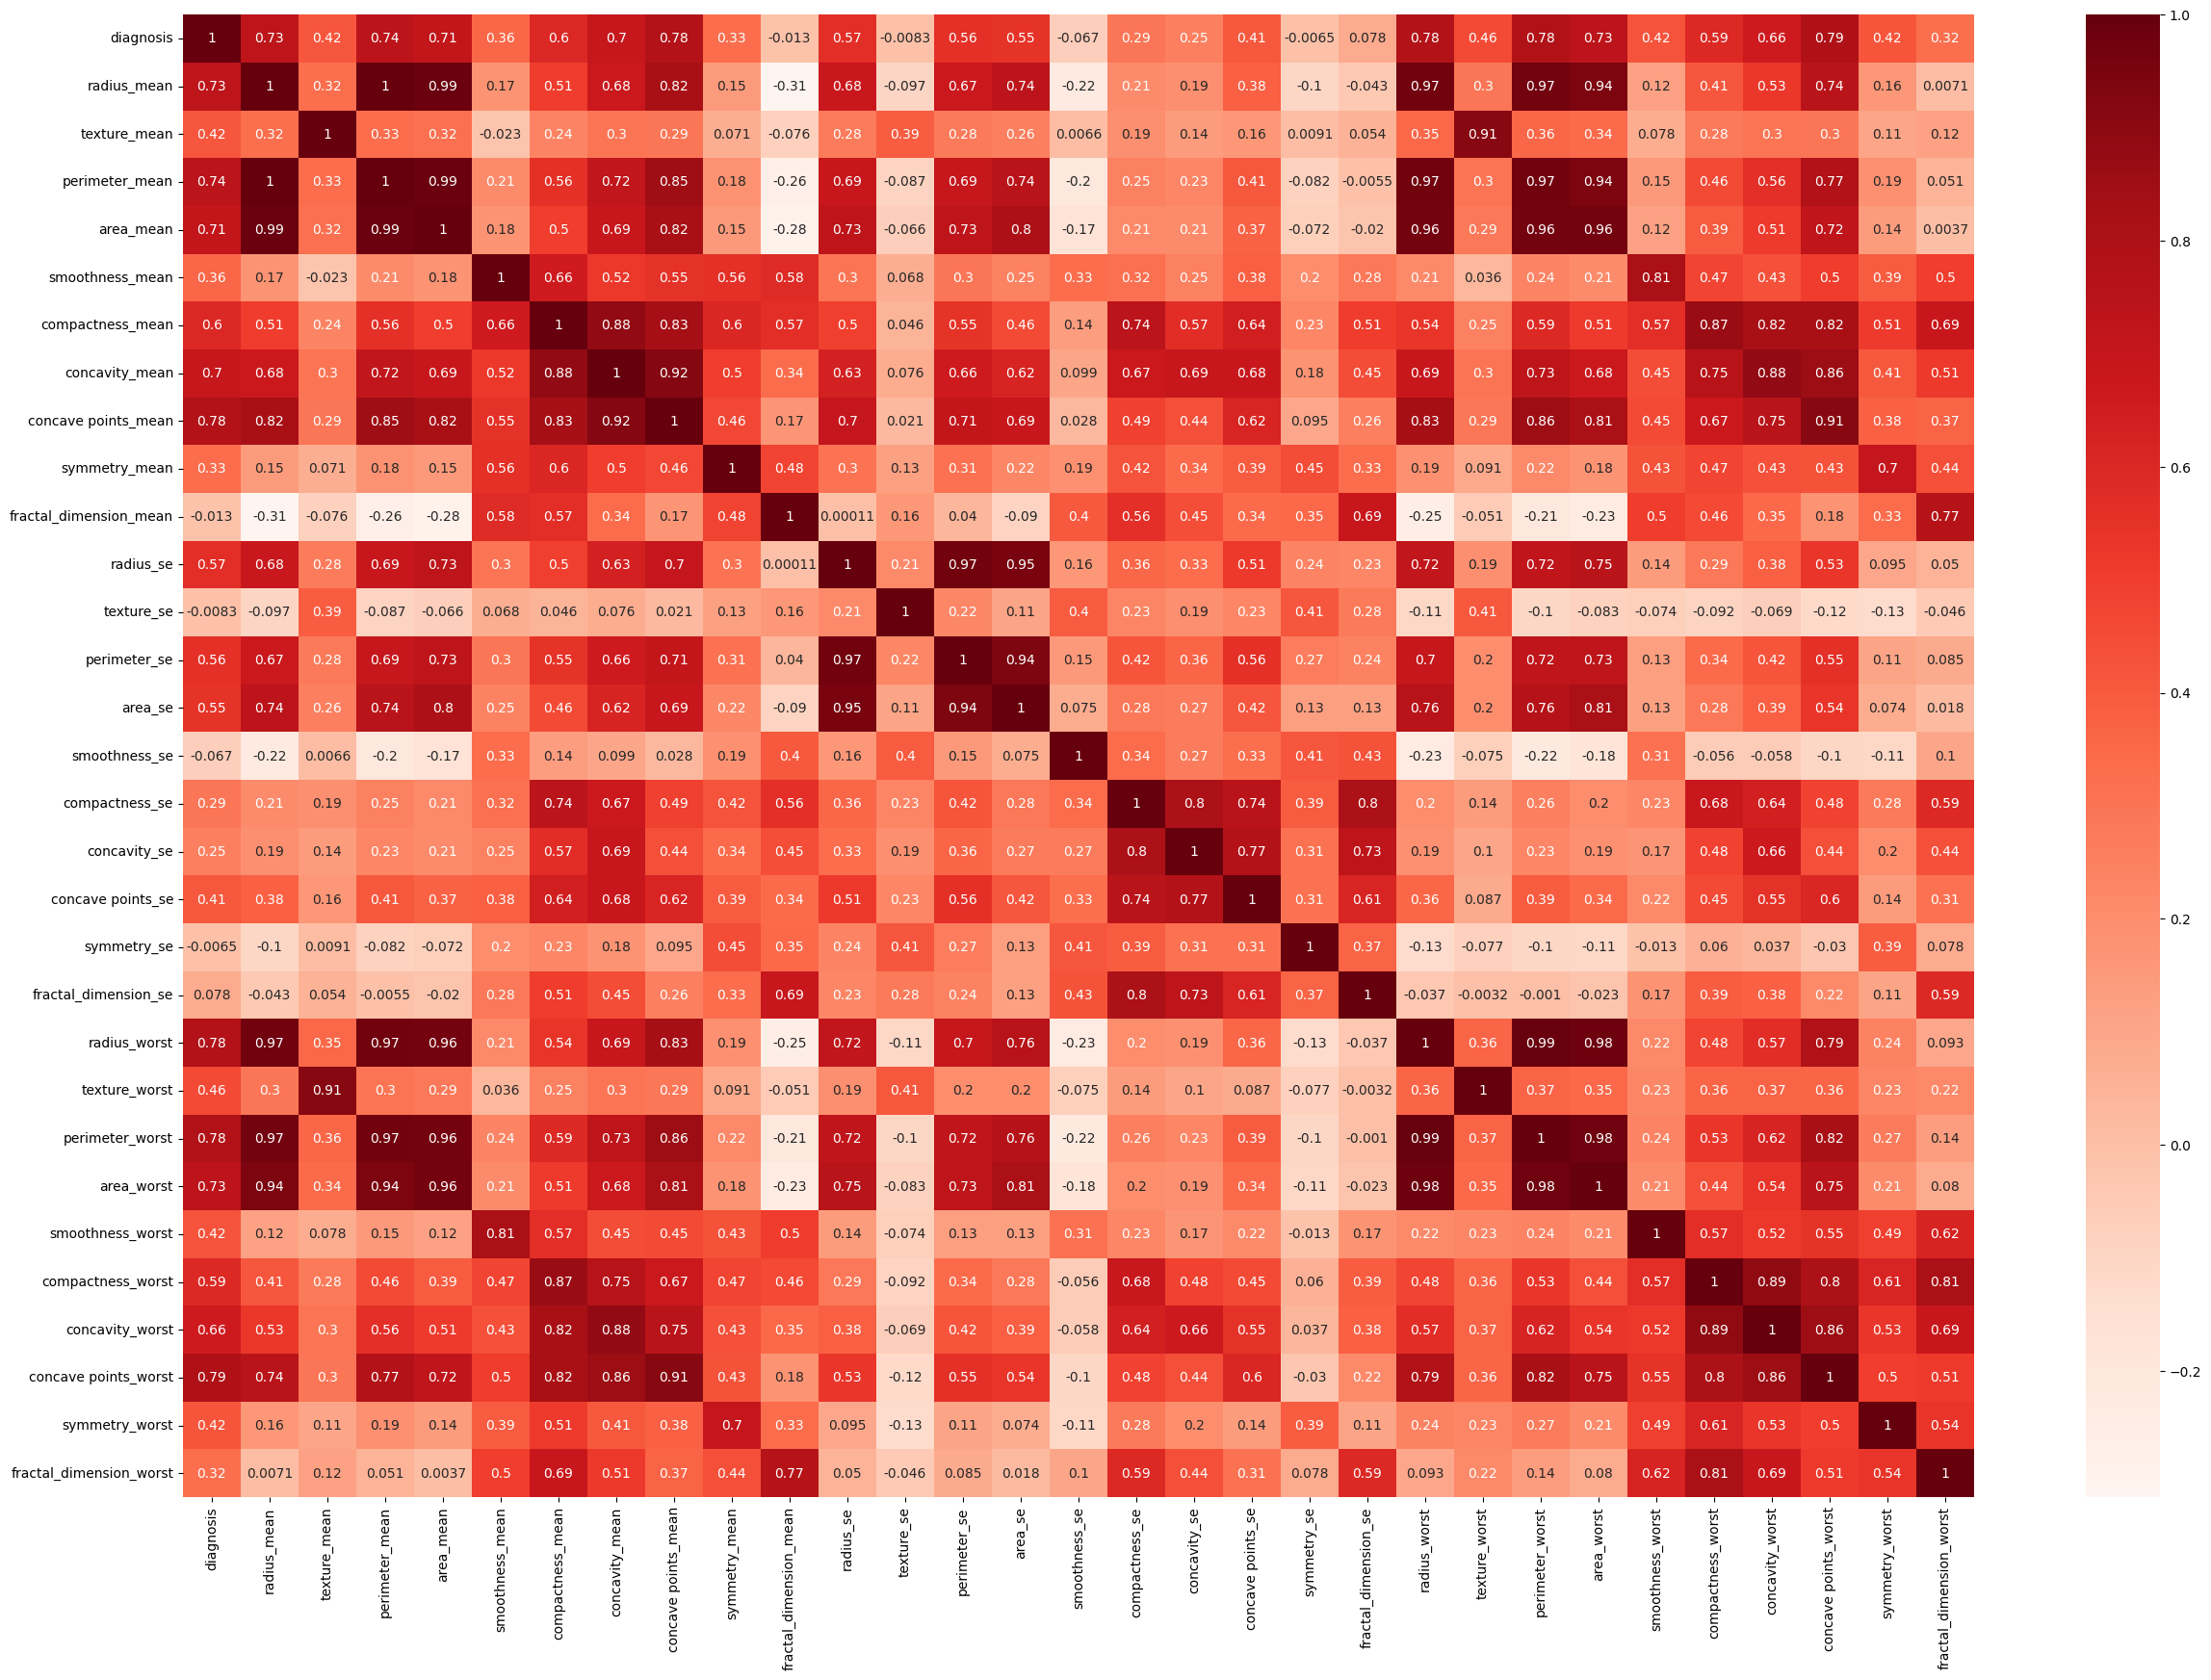

In [ ]:
plt.figure(figsize=(30,20))
cor = df.iloc[:,1:].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Diagonal correlation matrix: Since correlation matrices are symmetric, half of the coefficients are redundant. Therefore, the diagonal correlation matrix is a quick and easy way to look at it.

<Axes: >

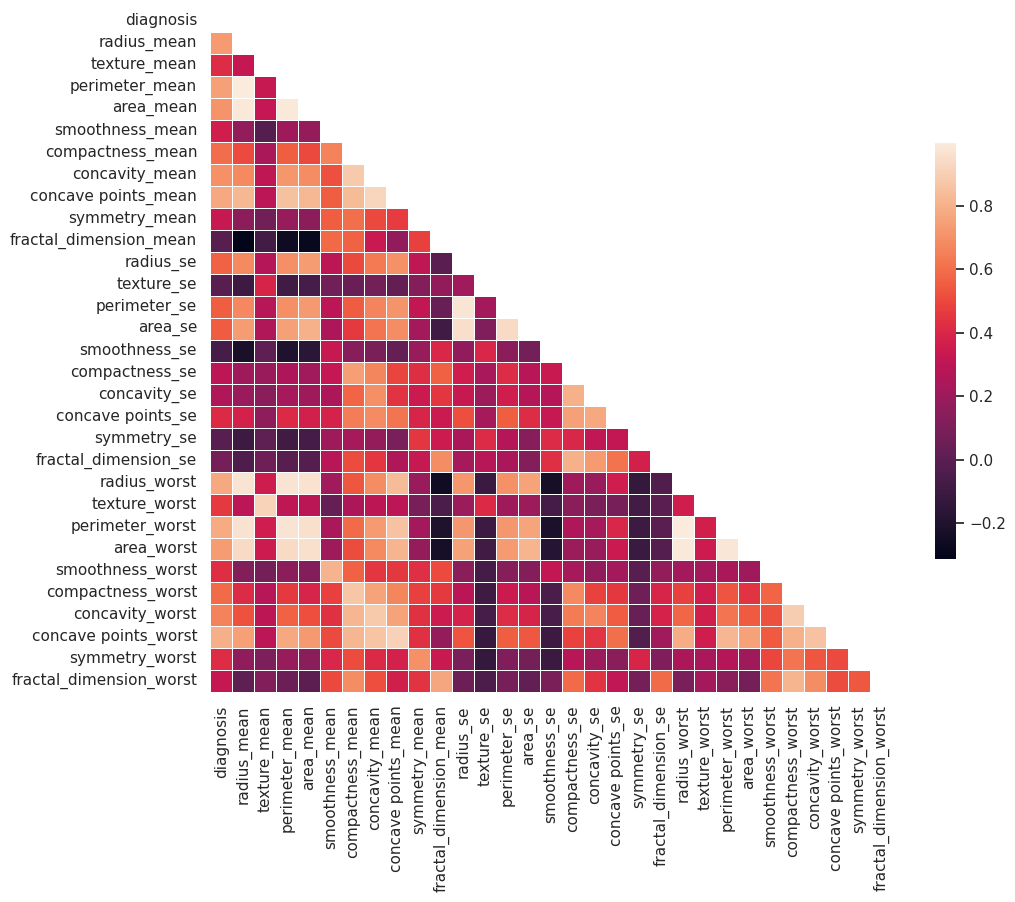

In [ ]:
sns.set_theme(style="white")
cor = df.iloc[:,1:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cor, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(cor, mask=mask,square=True, linewidths=.5, cbar_kws={"shrink": .6})

In [ ]:
#Correlation with output variable
cor_target = abs(cor["diagnosis"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

,diagnosis
diagnosis,1.000000
radius_mean,0.730029
perimeter_mean,0.742636
area_mean,0.708984
concave points_mean,0.776614
radius_worst,0.776454
perimeter_worst,0.782914
area_worst,0.733825
concave points_worst,0.793566


## Train and Test Model
*  This is a binary classification problem, and a few algorithms are appropriate for use (Naive Bayes, KNN, Logistic Regression, Decision Tree, Random Forest)
*   We will use 10 fold cross validation for each model.

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.25, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Define models to train
models= []
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LogReg', LogisticRegression(random_state=0)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',random_state=0)))
models.append(('RF', RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)))

# evaluate each model in turn on train set with 10 fold cross-validation
results = []
names = []

kfold = KFold(n_splits=10)

for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s \nMean accuracy = %f , Std accuracy = %f\n" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NB 
Mean accuracy = 0.941417 , Std accuracy = 0.034815

KNN 
Mean accuracy = 0.962514 , Std accuracy = 0.028050

LogReg 
Mean accuracy = 0.978959 , Std accuracy = 0.030328

DT 
Mean accuracy = 0.936656 , Std accuracy = 0.038957

RF 
Mean accuracy = 0.941362 , Std accuracy = 0.034983



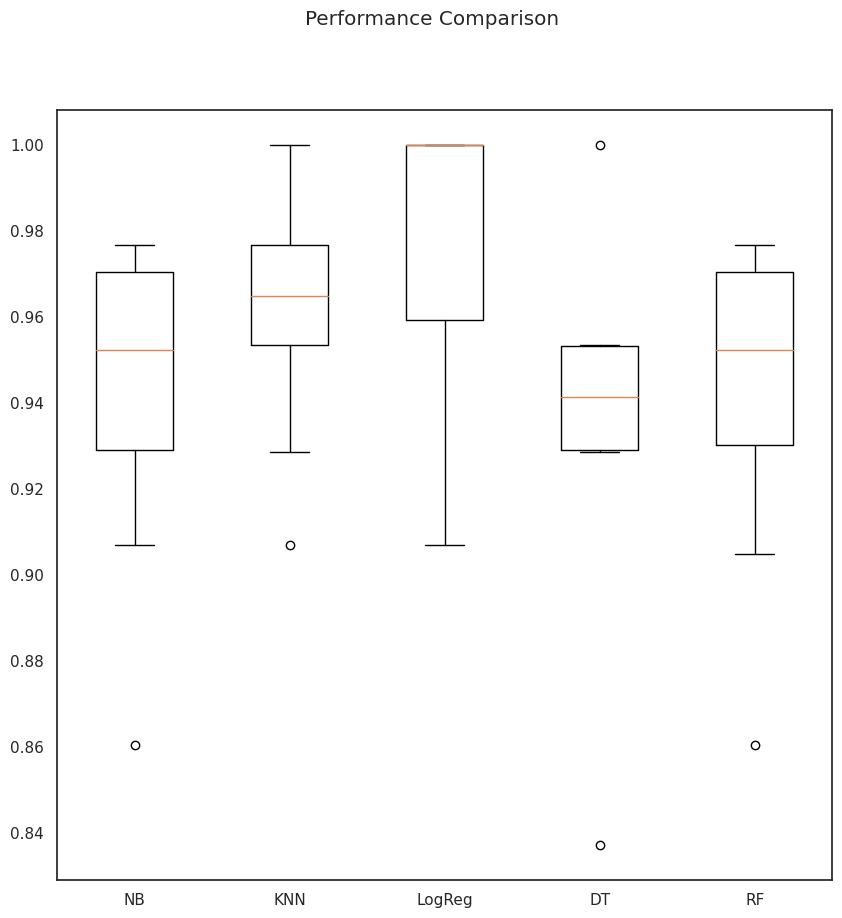

In [ ]:
#compare these models performance
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Make predictions on test set
# Accuracy - ratio of correctly predicted observation to the total observations.(TP+TN)/total
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class.
# F1 score - F1 Score is the weighted average of Precision and Recall.

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\n%s" %name)
    print("Accuracy score:" , accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))
    print("Confusion Matrix:\n",confusion_matrix(Y_test, predictions))


NB
Accuracy score: 0.916083916083916
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        90
           1       0.89      0.89      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143

Confusion Matrix:
 [[84  6]
 [ 6 47]]

KNN
Accuracy score: 0.951048951048951
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

Confusion Matrix:
 [[89  1]
 [ 6 47]]

LogReg
Accuracy score: 0.958041958041958
Classification report:
               precision    recall  f1-score   support

           0       0.97 